In [ ]:
!pip install opencv-python

In [ ]:
!pip install Pillow

In [ ]:
!pip install sklearn

In [ ]:
!pip install matplotlib

In [ ]:
!pip install tensorflow_hub

In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

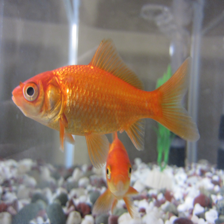

In [4]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [5]:
# Scale or normalize the image
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish

array([[[0.45490196, 0.45490196, 0.50588235],
        [0.45490196, 0.46666667, 0.5254902 ],
        [0.45490196, 0.4745098 , 0.53333333],
        ...,
        [0.30588235, 0.30196078, 0.29411765],
        [0.31764706, 0.29803922, 0.31764706],
        [0.30588235, 0.30196078, 0.32156863]],

       [[0.4627451 , 0.47058824, 0.51764706],
        [0.4627451 , 0.47843137, 0.53333333],
        [0.46666667, 0.47843137, 0.54509804],
        ...,
        [0.30980392, 0.30196078, 0.31372549],
        [0.32156863, 0.31372549, 0.3254902 ],
        [0.32156863, 0.31764706, 0.31764706]],

       [[0.4745098 , 0.47843137, 0.52941176],
        [0.4745098 , 0.49019608, 0.54117647],
        [0.47843137, 0.49411765, 0.54509804],
        ...,
        [0.31372549, 0.30588235, 0.32941176],
        [0.31372549, 0.30588235, 0.31764706],
        [0.31372549, 0.29803922, 0.30980392]],

       ...,

       [[0.55686275, 0.55686275, 0.56470588],
        [0.57254902, 0.56862745, 0.56862745],
        [0.59215686, 0

In [7]:
# Adding one more axis as for prediction we will have more imputs not single image
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
result

array([[ 0.22442636,  3.528378  , 11.014777  , ..., -1.9510896 ,
         0.8964548 ,  0.3951555 ]], dtype=float32)

In [10]:
# argmax return the index of max value
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [11]:
image_labels = []
with open("ImageNetLabels.txt","r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]

'goldfish'

## Load Flower Dataset

In [13]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
data_dir

'.\\datasets\\flower_photos'

In [14]:
# Changing into file path of windows to fetch all the directories
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [15]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [17]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

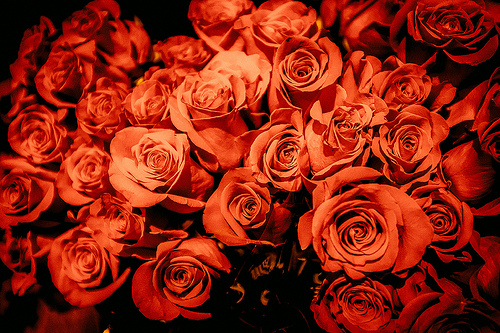

In [18]:
Image.open(str(roses[2]))

In [19]:
flower_image_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [20]:
flower_label_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [21]:
str(flower_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [22]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [23]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [24]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img =cv2.resize(img, IMAGE_SHAPE)
        X.append(resize_img)
        y.append(flower_label_dict[flower_name])

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
X

array([[[[  0,  15,   6],
         [  0,  15,   6],
         [  0,  16,   7],
         ...,
         [ 24,  51,  31],
         [ 25,  52,  32],
         [ 26,  53,  33]],

        [[  8,  22,  14],
         [  8,  22,  14],
         [  7,  21,  14],
         ...,
         [ 21,  47,  31],
         [ 24,  49,  34],
         [ 25,  51,  35]],

        [[ 12,  22,  15],
         [ 12,  22,  15],
         [ 11,  22,  14],
         ...,
         [ 21,  43,  31],
         [ 24,  46,  33],
         [ 26,  48,  36]],

        ...,

        [[ 17,  29,  25],
         [ 14,  25,  20],
         [ 13,  22,  15],
         ...,
         [  2,  11,   2],
         [  0,   7,   1],
         [  0,   4,   0]],

        [[ 19,  30,  28],
         [ 18,  28,  25],
         [ 16,  25,  19],
         ...,
         [  2,  10,   2],
         [  1,   8,   2],
         [  0,   7,   2]],

        [[  9,  19,  19],
         [ 15,  23,  22],
         [ 19,  27,  24],
         ...,
         [  1,  11,   2],
        

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
X_trained_scaled = X_train / 255
X_test_scaled = X_test / 255

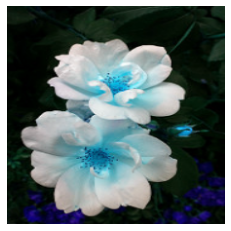

In [29]:
plt.axis('off')
plt.imshow(X[0])

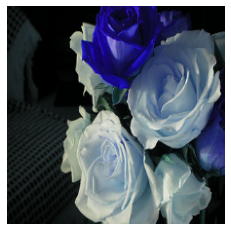

In [30]:
plt.axis('off')
plt.imshow(X[1])

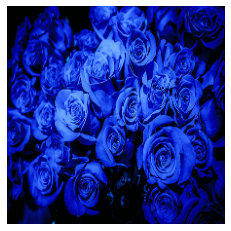

In [31]:
plt.axis('off')
plt.imshow(X[2])

In [32]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted 

array([795, 880, 795], dtype=int64)

In [34]:
# We cant use the readymate model as it only has daisy as the flower not rest of them
image_labels[795]

'shower curtain'

### Retrain the Model with the new flower dataset

In [35]:
# Feature vector gives all the layer except the last layer that is softmax
# Trainable = False all the model will have fixed weights, all layer will hv fixed weights

feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model_without_top_layer = hub.KerasLayer( 
    feature_extractor_model, input_shape=(224,224,3), trainable=False)

In [36]:
num_of_flowers = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_trained_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 74s 863ms/step - loss: 0.4556 - acc: 0.8361
Epoch 2/5
86/86 [==============================] - 74s 860ms/step - loss: 0.3268 - acc: 0.8921
Epoch 3/5
86/86 [==============================] - 74s 863ms/step - loss: 0.2646 - acc: 0.9168
Epoch 4/5
86/86 [==============================] - 74s 861ms/step - loss: 0.2201 - acc: 0.9353
Epoch 5/5
69/86 [=======================>......] - ETA: 14s - loss: 0.1962 - acc: 0.9497

In [ ]:
model.evaluate(X_test_scaled, y_test)

In [ ]:
1